# **Post-Read 1: Deeper Dive into Hypothesis Testing for One-Sample Tests**

*This notebook is a **supplementary** resource for Main Lecture 1. It provides additional conceptual depth and practice for hypothesis testing fundamentals, focusing on Type I & II errors, power, confidence intervals, effect size (Cohen’s d), and the role of the Central Limit Theorem.*

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/102/634/original/medical_cost.zip

--2025-01-21 04:39:57--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/102/634/original/medical_cost.zip
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.24, 13.224.9.103, 13.224.9.181, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16425 (16K) [application/zip]
Saving to: ‘medical_cost.zip’

medical_cost.zip    100%[===================>]  16.04K  69.3KB/s    in 0.2s    

2025-01-21 04:39:59 (69.3 KB/s) - ‘medical_cost.zip’ saved [16425/16425]



In [ ]:
!unzip medical_cost.zip

Archive:  medical_cost.zip
  inflating: insurance.csv           


In [ ]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---


## 1. Introduction

In **Main Lecture 1**, you learned about:
- Formulating a **one-sample hypothesis test** (e.g., is the average <font color="blue">charges</font> equal to 12,000?).
- Identifying **Type I** and **Type II** errors.
- Calculating **confidence intervals**.
- Leveraging the **Central Limit Theorem (CLT)**.
- Conducting basic analyses in Python.

Here, we extend those topics with deeper **theoretical explanations** and **practical code snippets**, focusing on:

- **Type I & II errors** and test **power**.
- **Confidence intervals** at various confidence levels.
- **Central Limit Theorem** demonstrations with simulations.
- **Effect size** (Cohen’s d) and its importance.
- Basic **power analysis** using Python libraries.

Feel free to **skim** or go in-depth; the goal is to enhance your understanding with **hands-on** examples.

---

## 3. Type I & II Errors, Power of a Test

### 3.1 Conceptual Overview

- **Type I Error (<font color="magenta">α</font>):** Rejecting the null hypothesis when it is actually true (a "false positive").
- **Type II Error (<font color="magenta">β</font>):** Failing to reject the null hypothesis when it is actually false (a "false negative").
- **Significance Level (<font color="magenta">α</font>):** The probability of a Type I error, commonly set at 0.05.
- **Power of a Test (<font color="magenta">1 - β</font>):** The probability of rejecting a false null hypothesis (i.e., detecting an effect if one truly exists).

In practical terms:
- A **higher power** test means you’re more likely to **detect a true difference**.
- Achieving higher power typically requires **larger sample sizes**.

### 3.2 Code Example: One-Sample t-Test with Different α Levels

Below is an illustrative code snippet showing how changing your <font color="magenta">α</font> threshold might affect your decision. We’ll:
1. Test whether the mean <font color="blue">charges</font> differs from 12,000.
2. Print the test statistic, p-value, and whether we reject the null for two α levels (0.05 and 0.01).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Hypothesized population mean
mu_0 = 12000

# Extract the charges column and remove missing values
charges = df['charges'].dropna()

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(charges, mu_0)

print(f"Test Statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

# Decision for alpha = 0.05
alpha_1 = 0.05
decision_1 = "Reject H0" if p_value < alpha_1 else "Fail to Reject H0"
print(f"Decision at alpha={alpha_1}: {decision_1}")

# Decision for alpha = 0.01
alpha_2 = 0.01
decision_2 = "Reject H0" if p_value < alpha_2 else "Fail to Reject H0"
print(f"Decision at alpha={alpha_2}: {decision_2}")

Test Statistic: 3.837
P-value: 0.000130
Decision at alpha=0.05: Reject H0
Decision at alpha=0.01: Reject H0


- As you **decrease** α from 0.05 to 0.01, it becomes **harder** to reject \( H_0 \), reducing the chance of a Type I error but **increasing** the chance of a Type II error.

---

## 4. Confidence Interval Deep Dive

### 4.1 Mathematical Review

A **confidence interval** for the mean using the **t-distribution** is typically:

\[
\bar{x} \; \pm \; t_{\alpha/2,\, n-1} \times \frac{s}{\sqrt{n}}
\]

where:
- \(\bar{x}\) is the sample mean,
- \(s\) is the sample standard deviation (using \(n-1\) in the denominator),
- \(n\) is the sample size,
- \(t_{\alpha/2,\, n-1}\) is the critical value from the t-distribution for a confidence level of \(1 - \alpha\).

### 4.2 Code Example: Confidence Intervals at Different Levels

In [ ]:
# We already have `charges = df['charges'].dropna()`
mean_charges = np.mean(charges)
std_charges = np.std(charges, ddof=1)
n = len(charges)

def t_confidence_interval(data_mean, data_std, sample_size, confidence=0.95):
    """
    Returns the (lower_bound, upper_bound) of a t-based confidence interval
    for the mean given a sample mean, standard deviation, and size.
    """
    alpha = 1 - confidence
    dof = sample_size - 1
    t_crit = stats.t.ppf(1 - alpha/2, df=dof)
    margin_of_error = t_crit * (data_std / np.sqrt(sample_size))
    return (data_mean - margin_of_error, data_mean + margin_of_error)

# Demonstrate intervals for 90%, 95%, 99%
for level in [0.90, 0.95, 0.99]:
    lower, upper = t_confidence_interval(mean_charges, std_charges, n, confidence=level)
    print(f"{int(level*100)}% CI: [{lower:.2f}, {upper:.2f}] (width = {upper - lower:.2f})")

90% CI: [12725.49, 13815.36] (width = 1089.87)
95% CI: [12620.95, 13919.89] (width = 1298.94)
99% CI: [12416.43, 14124.41] (width = 1707.98)


Observe how the **interval width** grows as confidence level increases (e.g., 99% > 95% > 90%).


---

## 5. Central Limit Theorem (CLT)

### 5.1 Why CLT Is Vital

Because of the **CLT**, we can often assume the **sampling distribution** of the mean is (approximately) normal for sufficiently large \(n\). This justifies applying **t-tests** and computing **confidence intervals** even if <font color="blue">charges</font> itself is somewhat skewed.

### 5.2 Code Example: CLT Simulation (Synthetic Data)

Below, we illustrate how sample means of a **non-normal** distribution approach normality. (Here we use an **exponential** distribution to mimic right-skewed data—similar to what might happen with some cost data.)

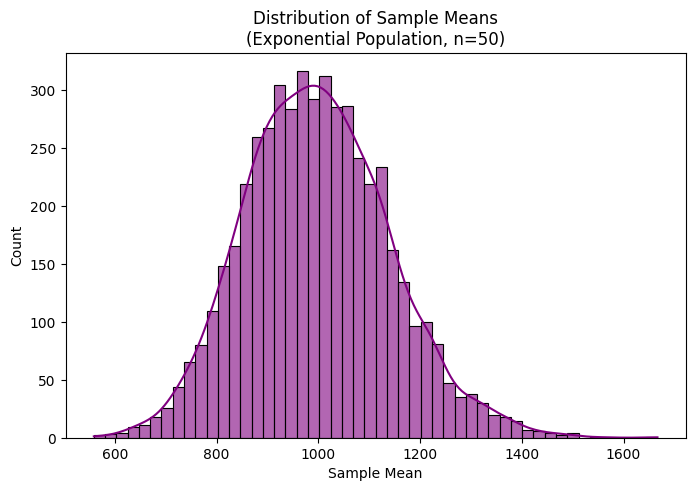

In [ ]:
# Simulation parameters
num_samples = 5000  # how many repeated samples
sample_size = 50    # each sample's size

# Create a large population from an exponential distribution
# (scale=1000 roughly sets the mean to 1000)
population = np.random.exponential(scale=1000, size=200000)

# Draw samples repeatedly, compute means
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Plot histogram of sample means
plt.figure(figsize=(8,5))
sns.histplot(sample_means, kde=True, color="purple", alpha=0.6)
plt.title(f"Distribution of Sample Means\n(Exponential Population, n={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Count")
plt.show()

💡 **Insight:** Even with a skewed underlying population, the distribution of **sample means** is more **bell-shaped**, demonstrating the CLT in action.

---

## 6. Effect Size (Cohen’s d)

### 6.1 Why Effect Size Matters

- **Statistical significance** (via p-values) tells us *whether* there’s a detectable difference.
- **Effect size** tells us *how large* that difference is in a standardized manner.

For a **one-sample** scenario, **Cohen’s d** is:

\[
d = \frac{\bar{x} - \mu_0}{s}
\]

where:
- \(\bar{x}\) = sample mean,
- \(\mu_0\) = hypothesized mean,
- \(s\) = sample standard deviation.

Typical interpretation (though context-dependent):
- 0.2: small  
- 0.5: medium  
- 0.8+: large  

### 6.2 Code Example: Calculating Cohen’s d

Below, we compute **Cohen’s d** to assess the magnitude of the difference between our sample mean and a hypothesized mean (12,000).

In [ ]:
# Hypothesized mean
mu_0 = 12000

mean_charges = np.mean(charges)
std_charges = np.std(charges, ddof=1)

cohens_d = (mean_charges - mu_0) / std_charges

print(f"Sample mean: {mean_charges:.2f}")
print(f"Hypothesized mean: {mu_0}")
print(f"Sample standard deviation: {std_charges:.2f}")
print(f"Cohen's d: {cohens_d:.3f}")

# Interpret based on general guidelines
if abs(cohens_d) < 0.2:
    interpretation = "Very small or negligible"
elif abs(cohens_d) < 0.5:
    interpretation = "Small"
elif abs(cohens_d) < 0.8:
    interpretation = "Medium"
else:
    interpretation = "Large"
print(f"Interpretation: {interpretation} effect size")

Sample mean: 13270.42
Hypothesized mean: 12000
Sample standard deviation: 12110.01
Cohen's d: 0.105
Interpretation: Very small or negligible effect size


---

## 7. Basic Power Analysis

### 7.1 Rationale

- A test with **low power** might fail to detect a practically significant effect (Type II error).
- Determining **appropriate sample sizes** can ensure you have sufficient power (commonly 80% or 90%).

### 7.2 Code Example: Power Analysis with `statsmodels`

Using `statsmodels.stats.power`, we can do a **rough** calculation of sample size needed for a certain effect size, α, and power.

In [ ]:
from statsmodels.stats.power import TTestPower

analysis = TTestPower()

# Suppose we want to detect a difference of 1000 in charges from 12000
# We estimate std_charges from our sample as stdev
# effect_size = difference / std
desired_difference = 1000
estimated_std = std_charges  # from our data
effect_size = desired_difference / estimated_std

alpha = 0.05
power = 0.80

required_n = analysis.solve_power(effect_size=effect_size,
                                  alpha=alpha,
                                  power=power,
                                  alternative='two-sided')

print(f"Required sample size for 80% power (effect size={effect_size:.3f}): {required_n:.2f}")

Required sample size for 80% power (effect size=0.083): 1152.98


- Adjust **desired_difference** based on the minimum difference you find practically significant.
- If your real-world effect is **smaller**, you need **larger** sample sizes to detect it with high power.


---

## 8. Extra Practice Problems

Below are **short exercises** to check your understanding. Try them before peeking at hints!

### 8.1 Type I vs. Type II Errors

**Q:** In a test that compares mean <font color="blue">charges</font> to 12,000, if you set α to 0.01 instead of 0.05, how does this affect Type I and Type II errors (qualitatively)?

<details>
<summary><em>Hint/Answer</em></summary>
- Lowering α to 0.01 **reduces** the probability of a Type I error (false positive).
- However, it may **increase** the probability of a Type II error (false negative), because the test is more “conservative” about rejecting \(H_0\).
</details>

---

### 8.2 Confidence Intervals

**Q:** If you construct a 95% CI for the mean <font color="blue">charges</font> and it **excludes** 12,000, what does that imply for a one-sample t-test at α=0.05?

<details>
<summary><em>Hint/Answer</em></summary>
If 12,000 is outside the 95% CI, it suggests the p-value < 0.05 (for a two-sided test). Therefore, you would **reject** \(H_0\) at α=0.05.
</details>

---

### 8.3 CLT Simulation Reflection

**Q:** Why can a t-test still be valid for skewed data like insurance charges when the sample size is large?

<details>
<summary><em>Hint/Answer</em></summary>
Due to the **Central Limit Theorem**, as sample size grows, the distribution of the *sample mean* becomes more normal, making the t-test assumptions more reasonable.
</details>

---

### 8.4 Cohen’s d Interpretation

**Q:** If Cohen’s d = 0.35, how would you describe the effect size, and why is this useful?

<details>
<summary><em>Hint/Answer</em></summary>
- 0.35 lies between 0.2 and 0.5, typically indicating a **small** to **medium** effect.  
- It’s useful because it quantifies how large the difference is in standardized units, complementing the p-value’s focus on significance.
</details>

---

### 8.5 Power Analysis

**Q:** Suppose we want 90% power (α=0.05) to detect a difference of 800 in <font color="blue">charges</font>. List two factors that would influence the sample size calculation.

<details>
<summary><em>Hint/Answer</em></summary>
1. The **standard deviation** of <font color="blue">charges</font> (larger variability -> larger required \(n\)).  
2. The **magnitude** of the difference itself (800). Smaller differences generally require bigger sample sizes to detect with the same power.
</details>

---